In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')

print(customers.head(),"\n")
print(products.head(),"\n")
print(orders.head())

   customer_id        name  age       country  gender
0            1  Customer_1   28         Egypt  Female
1            2  Customer_2   43  Saudi Arabia    Male
2            3  Customer_3   53  Saudi Arabia  Female
3            4  Customer_4   46         Egypt    Male
4            5  Customer_5   52         Egypt  Female 

   product_id product_name     category   price    cost
0           1    Product_1         Toys   59.94   46.05
1           2    Product_2  Electronics  385.43   21.99
2           3    Product_3  Electronics  274.96  132.40
3           4    Product_4       Beauty  238.96   44.13
4           5    Product_5         Home  312.44  170.43 

   order_id  customer_id  product_id  quantity  order_date
0         1          379          22         9  2023-08-22
1         2          203          63         5  2023-12-03
2         3          218          30         9  2023-06-14
3         4          447          82         2  2024-08-17
4         5          497          16     

In [25]:
print(customers.info(), "\n")
print(products.info(), "\n")
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  500 non-null    int64 
 1   name         500 non-null    object
 2   age          500 non-null    int64 
 3   country      500 non-null    object
 4   gender       500 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.7+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    100 non-null    int64  
 1   product_name  100 non-null    object 
 2   category      100 non-null    object 
 3   price         100 non-null    float64
 4   cost          100 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data

In [26]:
print(customers.isnull().sum(),"\n")
print(products.isnull().sum(),"\n")
print(orders.isnull().sum())


customers.fillna({'country':'Unknown'},inplace=True)
orders.dropna(inplace=True)


customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)

customer_id    0
name           0
age            0
country        0
gender         0
dtype: int64 

product_id      0
product_name    0
category        0
price           0
cost            0
dtype: int64 

order_id       0
customer_id    0
product_id     0
quantity       0
order_date     0
dtype: int64


In [27]:
orders = orders.merge(customers,on='customer_id',how='left')
print(orders.head())

   order_id  customer_id  product_id  quantity  order_date          name  age  \
0         1          379          22         9  2023-08-22  Customer_379   30   
1         2          203          63         5  2023-12-03  Customer_203   40   
2         3          218          30         9  2023-06-14  Customer_218   53   
3         4          447          82         2  2024-08-17  Customer_447   34   
4         5          497          16         4  2024-11-06  Customer_497   24   

        country  gender  
0  Saudi Arabia    Male  
1  Saudi Arabia  Female  
2  Saudi Arabia  Female  
3         Qatar    Male  
4        Kuwait  Female  


In [28]:
orders=orders.merge(products,on='product_id',how='left')
print(orders.head())

   order_id  customer_id  product_id  quantity  order_date          name  age  \
0         1          379          22         9  2023-08-22  Customer_379   30   
1         2          203          63         5  2023-12-03  Customer_203   40   
2         3          218          30         9  2023-06-14  Customer_218   53   
3         4          447          82         2  2024-08-17  Customer_447   34   
4         5          497          16         4  2024-11-06  Customer_497   24   

        country  gender product_name  category   price    cost  
0  Saudi Arabia    Male   Product_22  Clothing   65.17   63.70  
1  Saudi Arabia  Female   Product_63  Clothing  311.95   65.40  
2  Saudi Arabia  Female   Product_30    Beauty  280.01  298.89  
3         Qatar    Male   Product_82    Beauty   39.93  307.25  
4        Kuwait  Female   Product_16  Clothing  102.81  185.46  


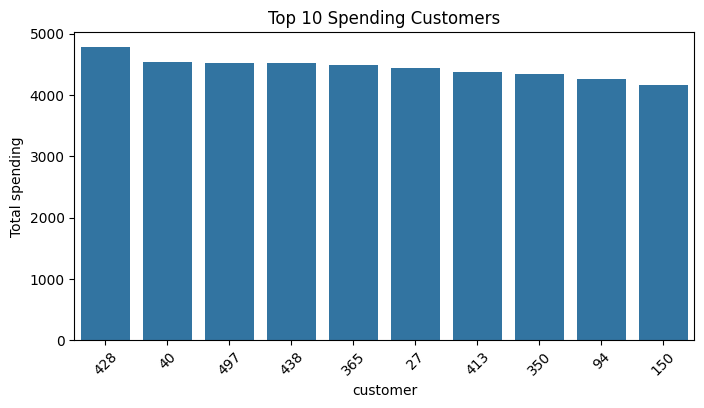

In [29]:
top_customer=orders.groupby('customer_id')['price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_customer.index.astype(str),y=top_customer.values)
plt.title('Top 10 Spending Customers')
plt.xlabel('customer')
plt.ylabel('Total spending')
plt.xticks(rotation=45)
plt.show()

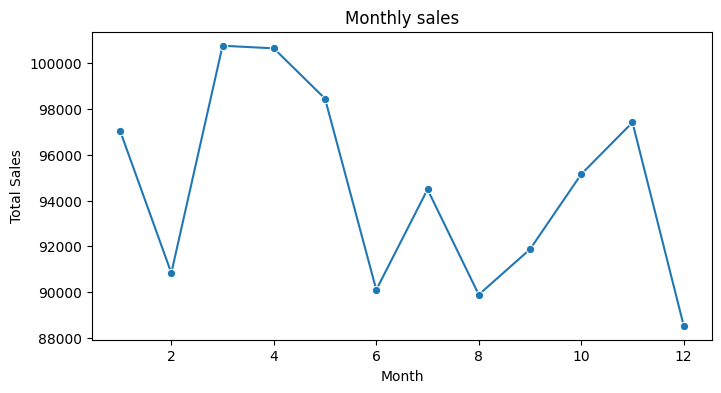

In [30]:
orders['order_date']=pd.to_datetime(orders['order_date'])
orders['month']=orders['order_date'].dt.month
monthly_sales=orders.groupby('month')['price'].sum()

plt.figure(figsize=(8,4))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

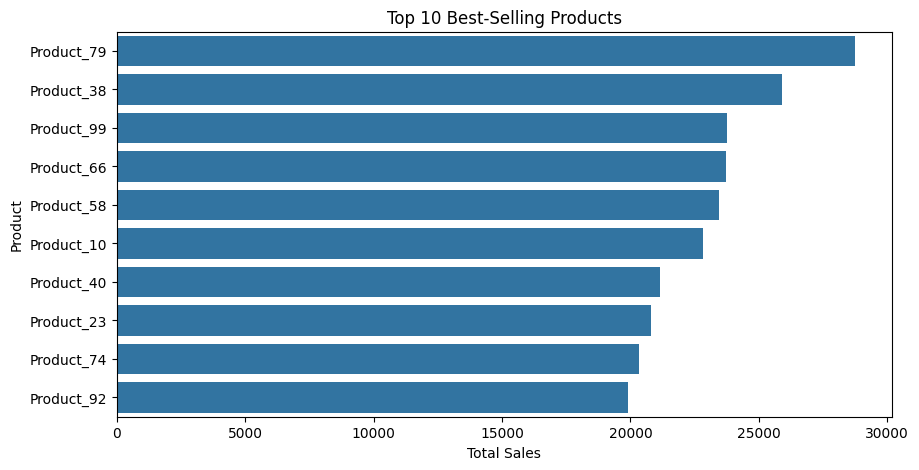

In [31]:
top_products = orders.groupby('product_name')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()


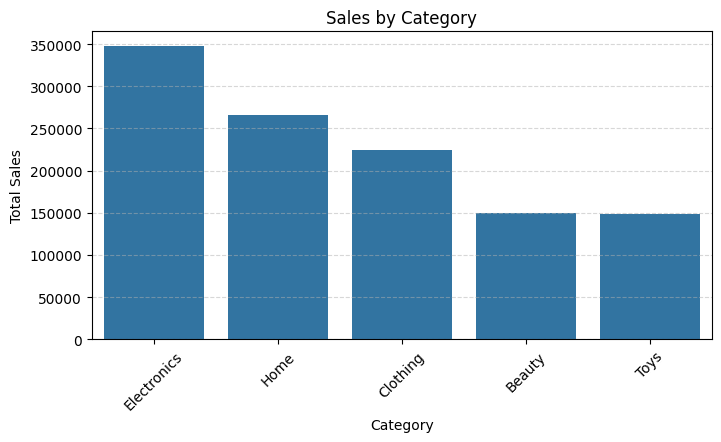

In [35]:
category_sales = orders.groupby('category')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

In [36]:
orders.to_csv('orders_clean.csv', index=False)